<a href="https://colab.research.google.com/github/psyuktha/sample/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-14 16:58:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-14 16:58:28 (78.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import plot_loss_curves,unzip_data,walk_through_dir,load_and_prep_image

In [4]:
unzip_data('/content/drive/MyDrive/archive (2).zip')

In [5]:
train_dir='/content/chest_xray/chest_xray/train'
test_dir='/content/chest_xray/chest_xray/test'

In [6]:
walk_through_dir('/content/chest_xray/chest_xray')

There are 3 directories and 1 images in '/content/chest_xray/chest_xray'.
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/test'.
There are 0 directories and 234 images in '/content/chest_xray/chest_xray/test/NORMAL'.
There are 0 directories and 390 images in '/content/chest_xray/chest_xray/test/PNEUMONIA'.
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/val'.
There are 0 directories and 9 images in '/content/chest_xray/chest_xray/val/NORMAL'.
There are 0 directories and 9 images in '/content/chest_xray/chest_xray/val/PNEUMONIA'.
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/train'.
There are 0 directories and 1342 images in '/content/chest_xray/chest_xray/train/NORMAL'.
There are 0 directories and 3876 images in '/content/chest_xray/chest_xray/train/PNEUMONIA'.


In [7]:
import tensorflow as tf
IMG_SIZE=(224,224)
train=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                             image_size=IMG_SIZE,
                                                             batch_size=32,
                                                             label_mode='binary')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=32,
                                                                label_mode='binary')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [8]:
efficientnet_url='https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1'

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


  feature_extraction_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False,#freeze already learnt paramenters
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3))

  model_1=tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(1,activation='sigmoid',name='output_layer')
  ])




model_1.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


history=model_1.fit(train,epochs=5,
                                steps_per_epoch=0.1*len(train),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[tensorboard_callback])


In [11]:
saved_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/pneumoniapred")

In [12]:
saved_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [13]:
saved_model_1.evaluate(test_data)

20/20 [==============================] - 115s 6s/step - loss: 2.8755 - accuracy: 0.7997


[2.875549793243408, 0.7996794581413269]

In [20]:
class_names=['NORMAL','PNEUMONIA']

In [17]:
import matplotlib.pyplot as plt
def predict(link):
  m=load_and_prep_image(link)
  pred=saved_model_1.predict(tf.expand_dims(m,axis=0))

  pred_class = int(tf.round(pred[0]))
  print('prediction:', class_names[pred_class])
  y= class_names[pred_class]

  plt.title("PNEUMONIA PREDICTION", color='Blue')


  if y=='PNEUMONIA':
    color='Red'
  else:
    color='Green'
  plt.xlabel("PREDICTION: {}".format(y),
             color=color)

  plt.imshow(m)

1/1 [==============================] - 0s 178ms/step
prediction: PNEUMONIA


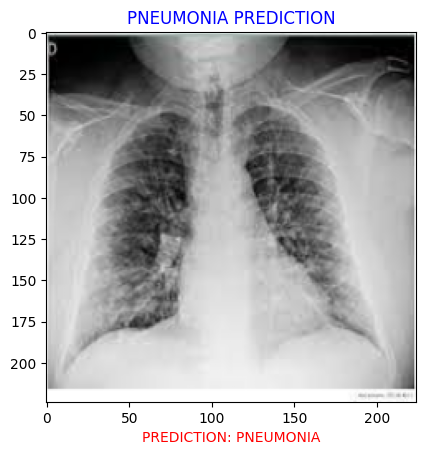

In [21]:
predict('/content/download (2).jpg')